In [133]:
# 1. Load the dataset from “data.csv”.  Create training and test datasets using random splitting (80-20)%. Print the  number of samples in train and test data groupby "roof_type".
# 2. Create training and test dataset using leave 5 "property_id" out for testing and rest of them for training. Print the train and test dataset for the first iteration only. Compare with Q-1 in terms of the number of training and testing samples using bar graph.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File path
folder = 'C:\\Users\\kcdin\\py3\\Margaret - Deakin\\SIT720\\Week5\\'

# Google Colab
# Note for self : Upload data to Google drive!!!
#folder = '/content/sample_data/'

# Load data_5.csv
df = pd.read_csv(folder+'data_5.csv')


In [2]:
# Validate if there is any missing data
print(df.isnull().sum())

structure_max_elevation    0
footprint_max_elevation    0
structure_min_elevation    0
property_id                0
footprint_extrusion        0
footprint_min_elevation    0
structure_extrusion        0
roof_type                  0
dtype: int64


In [3]:
print(df.head())

   structure_max_elevation  footprint_max_elevation  structure_min_elevation  \
0                     30.5                     30.5                     17.5   
1                     32.5                     26.5                     18.0   
2                     32.5                     32.5                     18.0   
3                     20.5                     19.5                     17.0   
4                     24.5                     23.5                     17.0   

   property_id  footprint_extrusion  footprint_min_elevation  \
0       109953                 13.5                     17.5   
1       105685                  9.0                     18.0   
2       105685                  5.5                     26.5   
3       104550                  2.0                     17.0   
4       104870                  6.0                     17.0   

   structure_extrusion roof_type  
0                 13.0      Flat  
1                  8.5      Flat  
2                 14.5       

c:\Users\kcdin\Anaconda3\envs\dj4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kcdin\Anaconda3\envs\dj4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kcdin\Anaconda3\envs\dj4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kcdin\Anaconda3\envs\dj4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

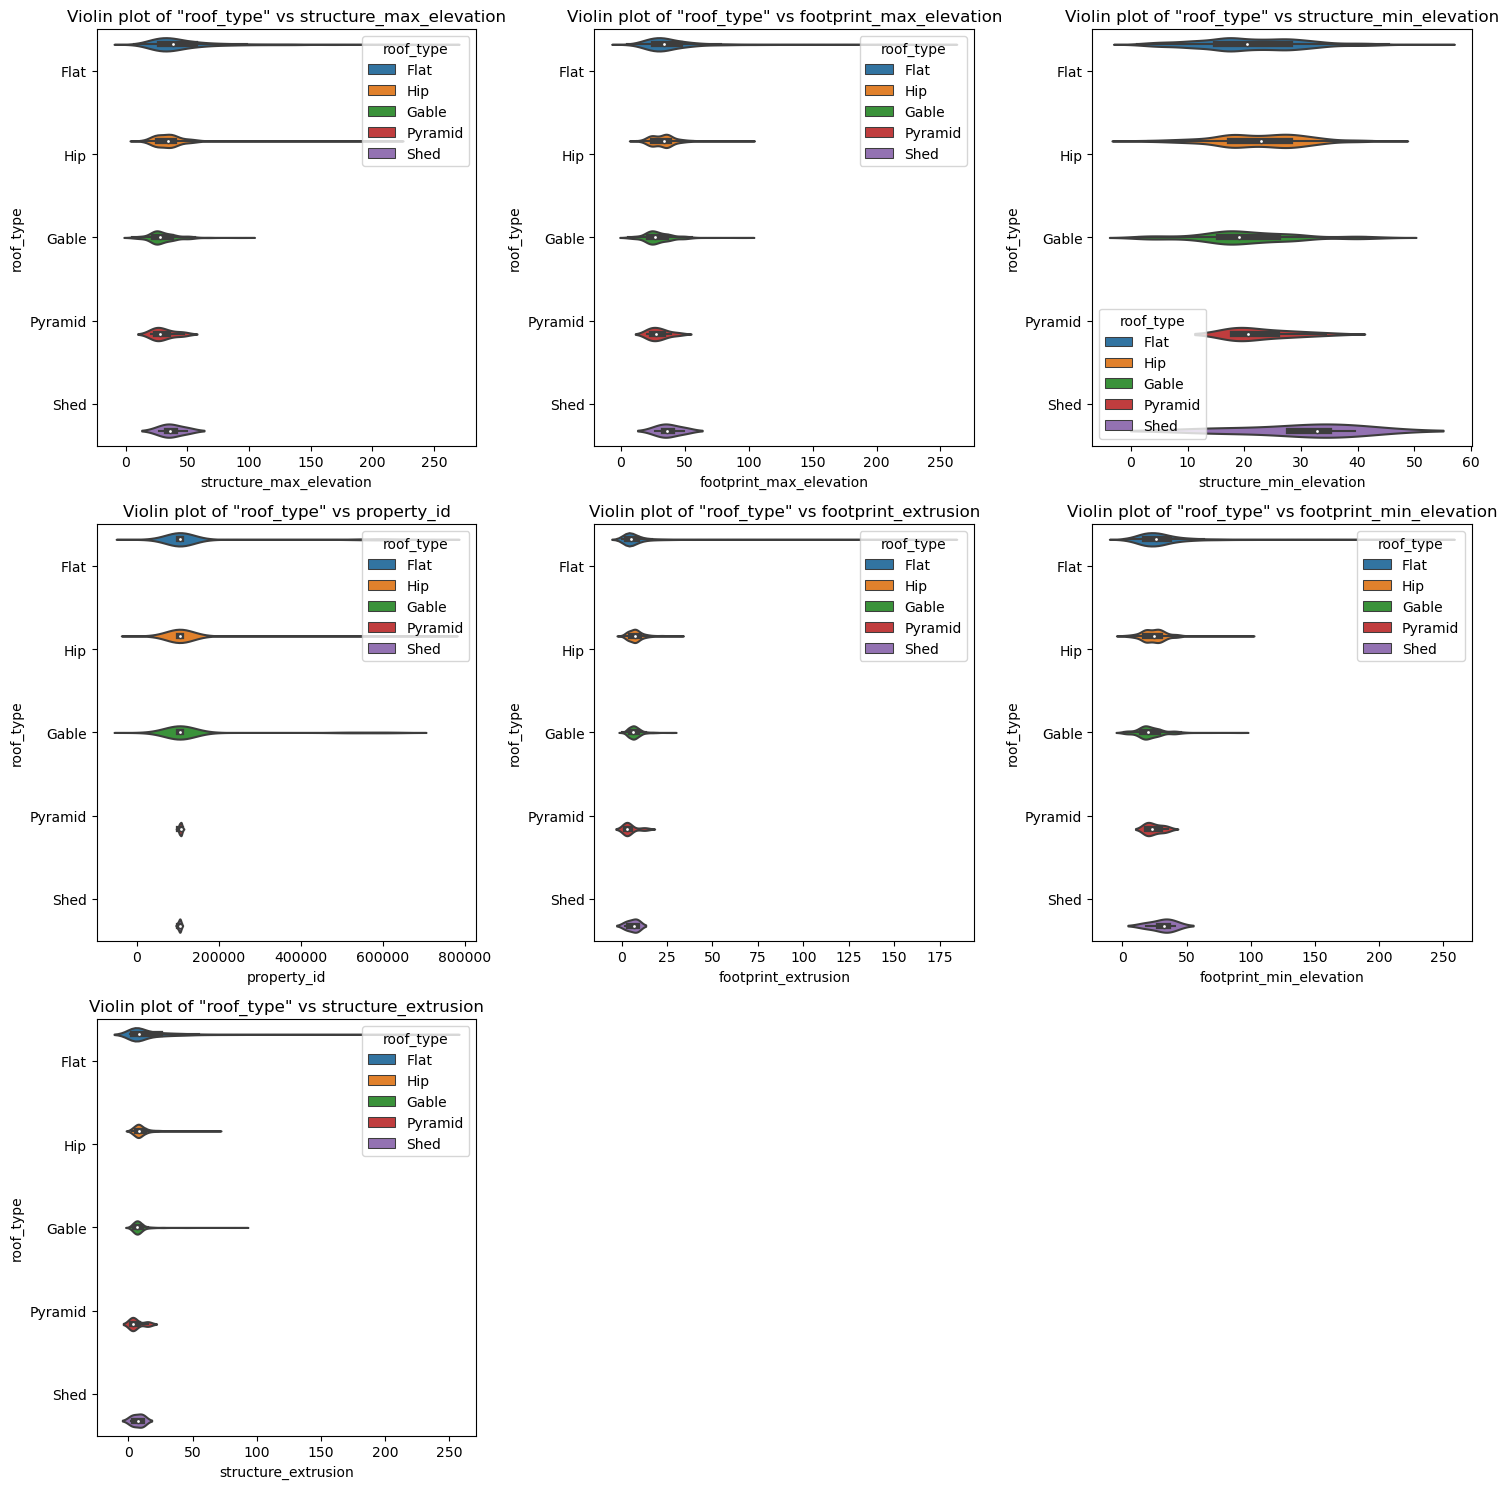

In [3]:
# Exploratory Data analysis step - Violin plot
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

n_cols = 3
n_rows = 3
cnt = 0


f = plt.figure(figsize=(15, 15))
for i, column in enumerate(df.columns):
    cnt += 1
    if column != 'roof_type':
        ax = f.add_subplot(n_rows, n_cols, cnt)
        sns.violinplot(x=df.columns[i], y=df['roof_type'],data=df ,ax=ax, hue=df['roof_type'])
        ax.set_title(f'Violin plot of "roof_type" vs {df.columns[i]}')


plt.tight_layout()
plt.show()

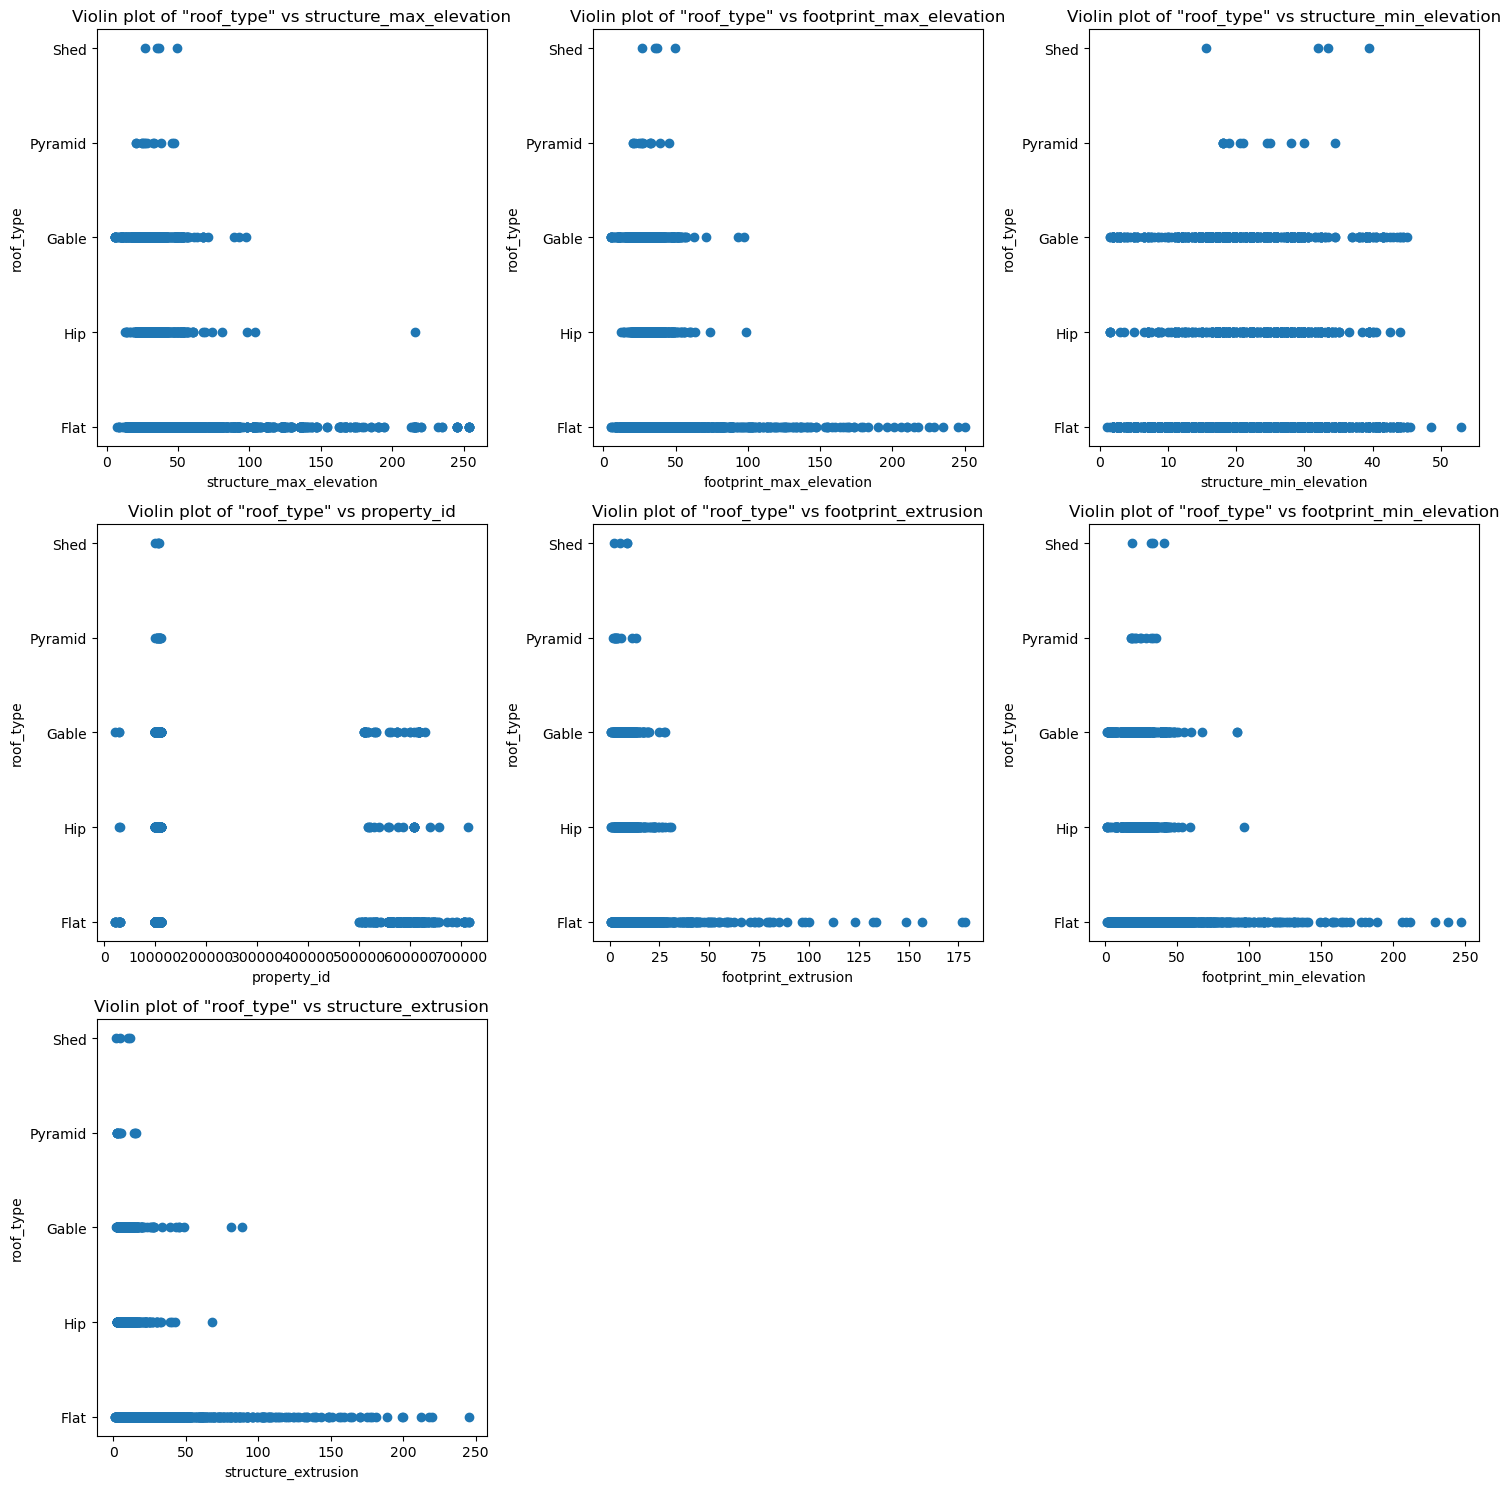

In [4]:
# Exploratory data analysis - scatter plots
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

n_cols = 3
n_rows = 3
cnt = 0


f = plt.figure(figsize=(15,15))
for i, column in enumerate(df.columns):
    cnt += 1
    if column != 'roof_type':
        ax = f.add_subplot(n_rows, n_cols, cnt)
        plt.scatter(x=df[df.columns[i]], y=df['roof_type'])
        ax.set_title(f'Violin plot of "roof_type" vs {df.columns[i]}')
        ax.set_xlabel(f'{df.columns[i]}')
        ax.set_ylabel(f'roof_type')


plt.tight_layout()
plt.show()

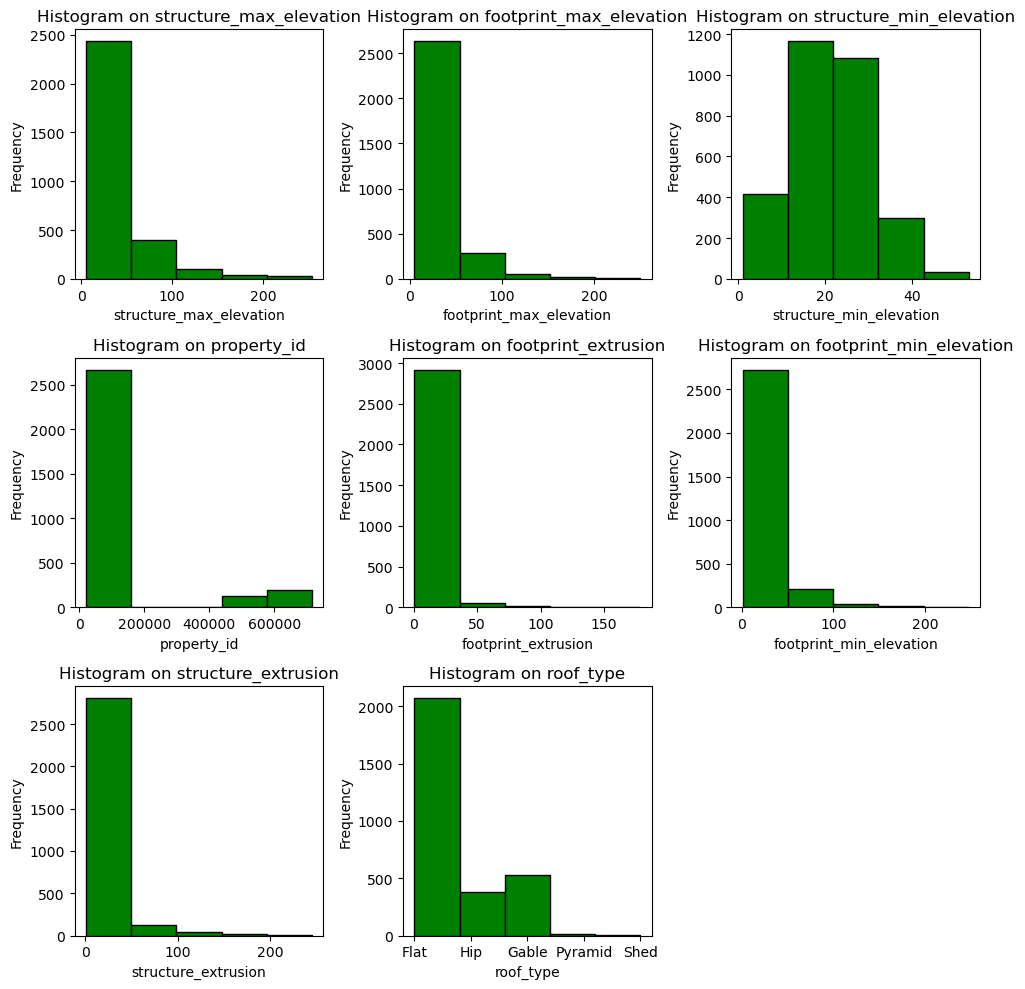

In [5]:
# Data exploration step - plot histogram

n_cols = 3
n_rows = 3
cnt = 0


f = plt.figure(figsize=(10,10))

for col in df.columns:
  cnt += 1
  #print(col)
  data = df[col]

  ax = f.add_subplot(n_rows, n_cols, cnt)
  # Create histogram
  plt.hist(data, bins=5, color='green', edgecolor='black')

  # Add labels and title
  ax.set_xlabel(f'{col}')
  ax.set_ylabel('Frequency')
  ax.set_title(f'Histogram on {col}')

  # Show plot
plt.tight_layout()
plt.show()


In [140]:
###############################################################
### Histogram of roof_type appeared skewed giving us a hint of imbalance classes
###############################################################

In [141]:
#### Scale the dataset 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Exclude roof_type feature
features_to_scale = df[['structure_max_elevation',
'footprint_max_elevation',
'structure_min_elevation',
'property_id',
'footprint_extrusion',
'footprint_min_elevation',
'structure_extrusion']]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
min_max_scaled_features = scaler.fit_transform(features_to_scale)  

min_max_scaled_df = pd.DataFrame(min_max_scaled_features, columns=features_to_scale.columns)


In [142]:
print(min_max_scaled_df.head())

   structure_max_elevation  footprint_max_elevation  structure_min_elevation  \
0                 0.100604                 0.103870                 0.317308   
1                 0.108652                 0.087576                 0.326923   
2                 0.108652                 0.112016                 0.326923   
3                 0.060362                 0.059063                 0.307692   
4                 0.076459                 0.075356                 0.307692   

   property_id  footprint_extrusion  footprint_min_elevation  \
0     0.128781             0.073034                 0.066937   
1     0.122643             0.047753                 0.068966   
2     0.122643             0.028090                 0.103448   
3     0.121011             0.008427                 0.064909   
4     0.121471             0.030899                 0.064909   

   structure_extrusion  
0             0.049080  
1             0.030675  
2             0.055215  
3             0.006135  
4        

In [143]:
print(df.columns)

Index(['structure_max_elevation', 'footprint_max_elevation',
       'structure_min_elevation', 'property_id', 'footprint_extrusion',
       'footprint_min_elevation', 'structure_extrusion', 'roof_type'],
      dtype='object')


In [6]:
###################################################################################################################################
# Q1. Load the dataset from “data.csv”.  Create training and test datasets using random splitting (80-20)%. Print the  number of samples in train and test data groupby "roof_type".
###################################################################################################################################

from sklearn.model_selection import train_test_split

# Split the data into test and train using SKlearn with test size as 20% and train size as 80%
random_train_df, random_test_df = train_test_split(df, test_size=0.2, random_state=42)

print("Random Train shape: ",random_train_df.shape)
print("Random Test shape: ",random_test_df.shape)

print()

print("Random Training Data Group by 'roof_type':")
print(random_train_df.groupby('roof_type').size())

print()
print("Random Testing Data Group by by 'roof_type':")
print(random_test_df.groupby('roof_type').size())




Random Train shape:  (2400, 8)
Random Test shape:  (600, 8)

Random Training Data Group by 'roof_type':
roof_type
Flat       1673
Gable       415
Hip         298
Pyramid      10
Shed          4
dtype: int64

Random Testing Data Group by by 'roof_type':
roof_type
Flat       400
Gable      115
Hip         83
Pyramid      2
dtype: int64


Leave 5 Property_id Out Training Dataset:
      structure_max_elevation  footprint_max_elevation  \
0                        30.5                     30.5   
1                        32.5                     26.5   
2                        32.5                     32.5   
3                        20.5                     19.5   
4                        24.5                     23.5   
...                       ...                      ...   
2995                     54.0                     49.5   
2996                     53.0                     45.0   
2997                     53.0                     51.0   
2998                     53.0                     44.0   
2999                     54.0                     47.5   

      structure_min_elevation  property_id  footprint_extrusion  \
0                        17.5       109953                 13.5   
1                        18.0       105685                  9.0   
2                        18.0       105685                  

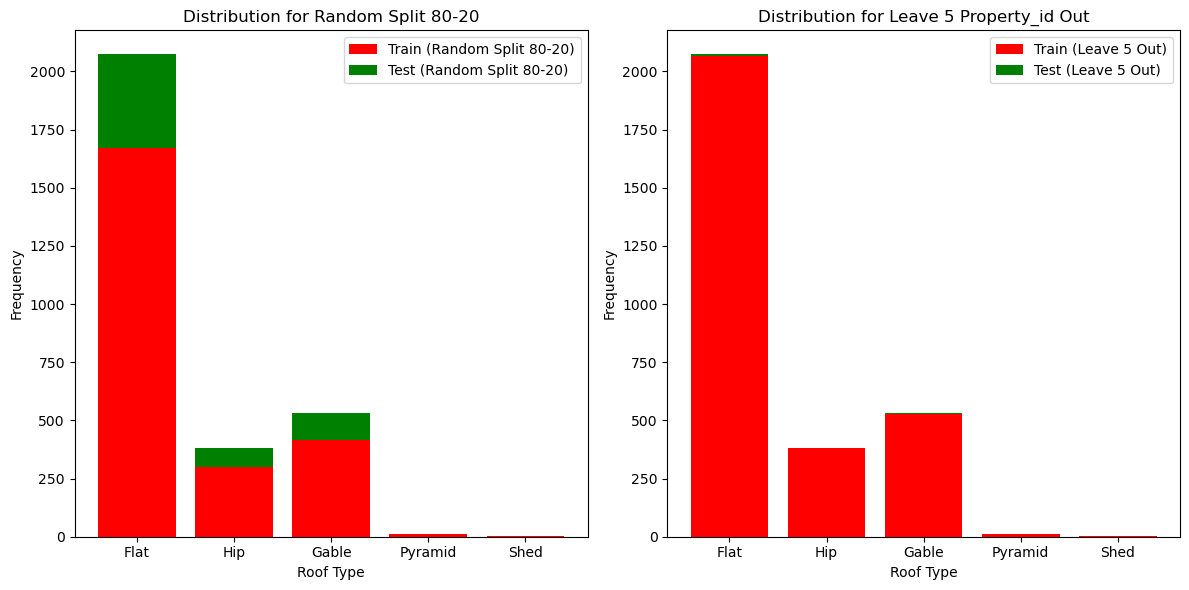

In [7]:
############################################################################################################################
##2. Create training and test dataset using leave 5 "property_id" out for testing and rest of them for training.
##Print the train and test dataset for the first iteration only. Compare with Q-1 in terms of the number of training and testing samples using bar graph.
############################################################################################################################



from numpy import array
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

# Set aside 5 random property_id for testing
l5o_test_property_ids = df['property_id'].sample(n=5, random_state=1).unique()

# Creating training and testing datasets
# Training property_ids are those not in l5o_test_property_ids
l5o_train_df = df[~df['property_id'].isin(l5o_test_property_ids)]
l5o_test_df = df[df['property_id'].isin(l5o_test_property_ids)]

# Print the datasets of Training and Testing 
print("Leave 5 Property_id Out Training Dataset:")
print(l5o_train_df)
print("Leave 5 Property_id Out Testing Dataset:")
print(l5o_test_df)

# Set up the subplot 
fig, ax = plt.subplots(1, 2, figsize=(12, 6))



# Gathering all unique roof types for a complete index in plots
all_roof_types = df['roof_type'].unique()

# Display all possible 'roof_type' 
print(all_roof_types)

# Grouping by 'roof_type' and counting frequency
# Aligning indices and filling missing data with 0
random_train_counts = random_train_df.groupby('roof_type').size().reindex(all_roof_types, fill_value=0)
random_test_counts = random_test_df.groupby('roof_type').size().reindex(all_roof_types, fill_value=0)

l5o_train_counts = l5o_train_df.groupby('roof_type').size().reindex(all_roof_types, fill_value=0)
l5o_test_counts = l5o_test_df.groupby('roof_type').size().reindex(all_roof_types, fill_value=0)

# Subplot 1 - Random split 80-20

# Bar chart for Random Split
ax[0].bar(random_train_counts.index, random_train_counts.values, color="red", label='Train (Random Split 80-20)')
ax[0].bar(random_test_counts.index, random_test_counts.values, color='green', bottom=random_train_counts.values, label='Test (Random Split 80-20)')
ax[0].set_title('Distribution for Random Split 80-20')
ax[0].set_xlabel('Roof Type')
ax[0].set_ylabel('Frequency')
ax[0].legend()

print(f"Leave 5 Property_id Out Train :\n{l5o_train_counts}")
print(f"Leave 5 Property_id Out Test :\n{l5o_test_counts}")

# Subplot 2 - Leave 5 out property_id

# Bar chart for Leave 5 out property_id
ax[1].bar(l5o_train_counts.index, l5o_train_counts.values, color="red", label='Train (Leave 5 Out)')
ax[1].bar(l5o_test_counts.index, l5o_test_counts.values, color='green', bottom=l5o_train_counts.values, label='Test (Leave 5 Out)')
ax[1].set_title('Distribution for Leave 5 Property_id Out')
ax[1].set_xlabel('Roof Type')
ax[1].set_ylabel('Frequency')
ax[1].legend()

plt.tight_layout()
plt.show()






In [9]:
############################################################################################################################
##2. Create training and test dataset using leave 5 "property_id" out for testing and rest of them for training.
##Print the train and test dataset for the first iteration only. Compare with Q-1 in terms of the number of training and testing samples using bar graph.
############################################################################################################################



from numpy import array
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split

from sklearn.model_selection import LeavePOut

import pandas as pd
import matplotlib.pyplot as plt

# Set aside 5 random property_id for testing
lpo_property_ids = df['property_id'].unique()


In [12]:
from numpy import array
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split

from sklearn.model_selection import LeavePOut


cv = LeavePOut(5)


X = df.iloc[:,:-1]

y = df.iloc[:,-1]

print(list(cv.split(X, groups=df['property_id'])))

